In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import MNIST train data

In [2]:
data = pd.read_csv('../data/train.csv')
data.shape

(42000, 785)

In [33]:
y = data['label'].as_matrix()
X = data.drop('label', axis=1).as_matrix()/255
print(y)
print(y.shape)
print()
print(X)
print(X.shape)

[1 0 1 ... 7 6 9]
(42000,)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(42000, 784)


In [34]:
# Get the covariance matrix of X
sigX = np.cov(X.T)
sigX.shape

(784, 784)

In [53]:
# Now get the eigenvalues and eigenvectors
sigZ, Q = np.linalg.eigh(sigX)
sigZ.shape

(784,)

In [37]:
# Let's see some of the biggest ones
sorted(sigZ/sum(sigZ), reverse=True)[:10]

[0.09748937689497447,
 0.07160266275027223,
 0.06145903355957272,
 0.05379301996327578,
 0.048942621340420246,
 0.043032139921394805,
 0.03277050763580557,
 0.028921031736972323,
 0.02766902346628106,
 0.023488710295319407]

In [39]:
# Now using Q (the matrix of eigenvectors), transform the matrix X into Z
Z = X.dot(Q)
Z.shape

(42000, 784)

In [40]:
# According to the theory: 
# The covariance matrix of Z is just the matrix of eigenvalues
# but it can also be calculated from the covariance of X using
# (Q.T)·(sigX)·(Q)
# Let's check if this holds
abs(sigZ.sum() - np.trace(np.dot((Q.T).dot(sigX), Q))) < 0.0001

True

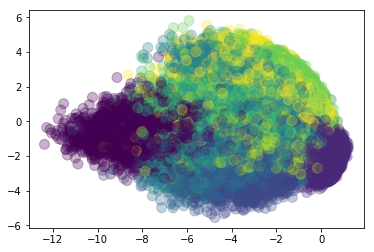

In [43]:
# Plot the numbers in our 2D reduced space.
# We can clearly see that certain colors group together
plt.scatter(Z[:,-1], Z[:,-2], s=100, c=y, alpha=0.3)
plt.show()

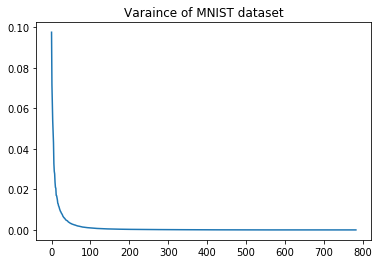

In [66]:
# Plot the normalized variance
var_norm = sorted(sigZ/sum(sigZ), reverse=True)
plt.plot(var_norm)
plt.title('Varaince of MNIST dataset')
plt.show()

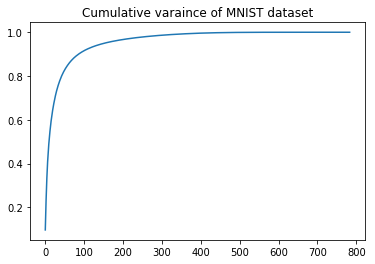

In [67]:
# Plot the cumulation of the normalized variance
plt.plot(np.cumsum(var_norm))
plt.title('Cumulative varaince of MNIST dataset')
plt.show()

## Sklearn version

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
reduced = pca.fit_transform(X)

In [16]:
reduced

array([[-2.59449325e+00, -2.74239737e+00,  7.18753097e-01, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.67235955e+00, -1.41392767e+00, -1.96786507e+00, ...,
        -1.61731653e-15,  3.59639828e-16, -6.58026832e-16],
       [-3.47801739e+00, -1.15202268e+00,  2.63354156e-01, ...,
        -4.17793976e-16, -7.48846922e-16,  6.86683755e-16],
       ...,
       [ 1.31870581e+00,  3.72555012e+00, -6.61197703e-01, ...,
        -1.63218598e-20,  4.59442931e-18,  4.30873063e-18],
       [ 1.28391918e+00,  2.43200351e-01,  2.73543686e+00, ...,
        -3.12553559e-18, -1.57841272e-18,  3.23848331e-18],
       [-1.42842823e+00,  1.64271775e+00,  2.46665973e-01, ...,
        -2.99306125e-18, -5.13265538e-18, -2.70530457e-18]])

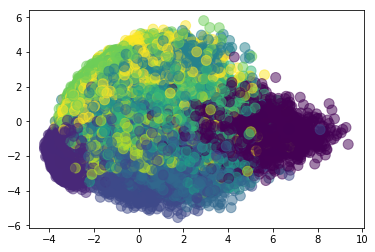

In [17]:
# Plot the numbers in our 2D reduced space.
# We can clearly see that certain colors group together
# for some reason it is backwards from my version?
plt.scatter(reduced[:,0], reduced[:,1], s=100, c=y, alpha=0.5)
plt.show()

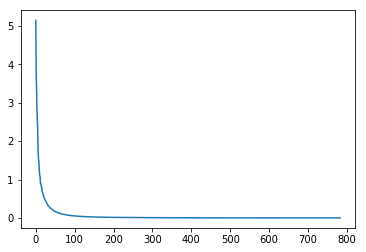

In [57]:
# Plot normalized variance
plt.plot(pca.explained_variance_)
plt.title('Varaince of MNIST dataset')
plt.show()

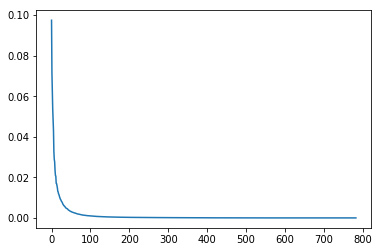

In [18]:
# Plot the cumulation of the normalized variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Cumulative varaince of MNIST dataset')
plt.show()

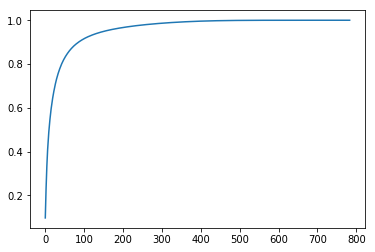

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

**Looks like everything mostly agrees with the sklearn version!!!**